# A tutorial for pressure sources in CSI

In this notebook, we show how to model displacements as measured by InSAR and GPS data with pressure sources. This part has been implemented by Tara Shreeve in 2019 and cleaned up by Romain Jolivet in 2024.  

In [1]:
# Numpy 
import numpy as np

# CSI 
import csi.insar as insar
import csi.gps as gps
import csi.Pressure as pressure
import csi.Mogi as mogi
import csi.Yang as yang
import csi.CDM as cdm 
import csi.pCDM as pcdm
from csi.csiutils import *

# Reference
lon0=10.0
lat0=30.0

## Testing the Mogi source in CSI

### Create the source

In [2]:
# Initialize the source
source = mogi('My Mogi source',  lon0=lon0, lat0=lat0)

# Make the shape 
# Lon, Lat, Depth, Radius 
# 10°, 30°, 2e3 m, 1000 m
source.createShape(10., 30., 2e3, 1e3, latlon=True)

# Make a pressure change (Pa)
source.setPressure(1e6)

---------------------------------
---------------------------------
Initializing pressure source My Mogi source


/Users/romainjolivet/MYBIN/csi/Mogi.py:260: Warning: Results may be inaccurate if depth is not much greater than radius
  warnings.warn('Results may be inaccurate if depth is not much greater than radius',Warning)


### Create the GNSS network

In [3]:
# Create a gps network
gpsNetwork = gps('My GPS network', lon0=lon0, lat0=lat0)

# Drop random stations around the source
# Center of the box (lon, lat), box size in degrees, number of stations
gpsNetwork.createNetwork(10., 30., .1, 300)

---------------------------------
---------------------------------
Initialize GPS array My GPS network


### Create the fake InSAR data

In [4]:
# Create some points where we will have InSAR data
sar = insar('My InSAR network', lon0=lon0, lat0=lat0)

# Fake pixel positions
lon = np.linspace(9.9, 10.1, 1000)
lat = np.linspace(29.9, 30.1, 1000)
lon,lat = np.meshgrid(lon,lat)
lon = lon.flatten().squeeze()
lat = lat.flatten().squeeze()

# Read data into the InSAR object (make it so that it has the incidence of an ascending track)
sar.read_from_binary(np.zeros(lon.shape), lon, lat, incidence=40., heading=-13.)
sar.nx = 1000
sar.ny = 1000


---------------------------------
---------------------------------
Initialize InSAR data set My InSAR network


### Build Greens' functions

In [5]:
# Build Green's functions
source.buildGFs(gpsNetwork)
source.buildGFs(sar, verbose=True, vertical=True)

Greens functions computation method: volume
---------------------------------
---------------------------------
Building pressure source Green's functions for the data set 
My GPS network of type gps in a homogeneous half-space
Converting to pressure for Mogi Green's function calculations
 
Greens functions computation method: volume
---------------------------------
---------------------------------
Building pressure source Green's functions for the data set 
My InSAR network of type insar in a homogeneous half-space
Converting to pressure for Mogi Green's function calculations
 


### Build synthetic motion

In [6]:
# Make a synthetic dataset
gpsNetwork.buildsynth(source)
sar.buildsynth(source)

# Here, everything is in meters. 
# Let's convert to cm
gpsNetwork.synth *= 1e2
sar.synth *= 1e2

### Show me

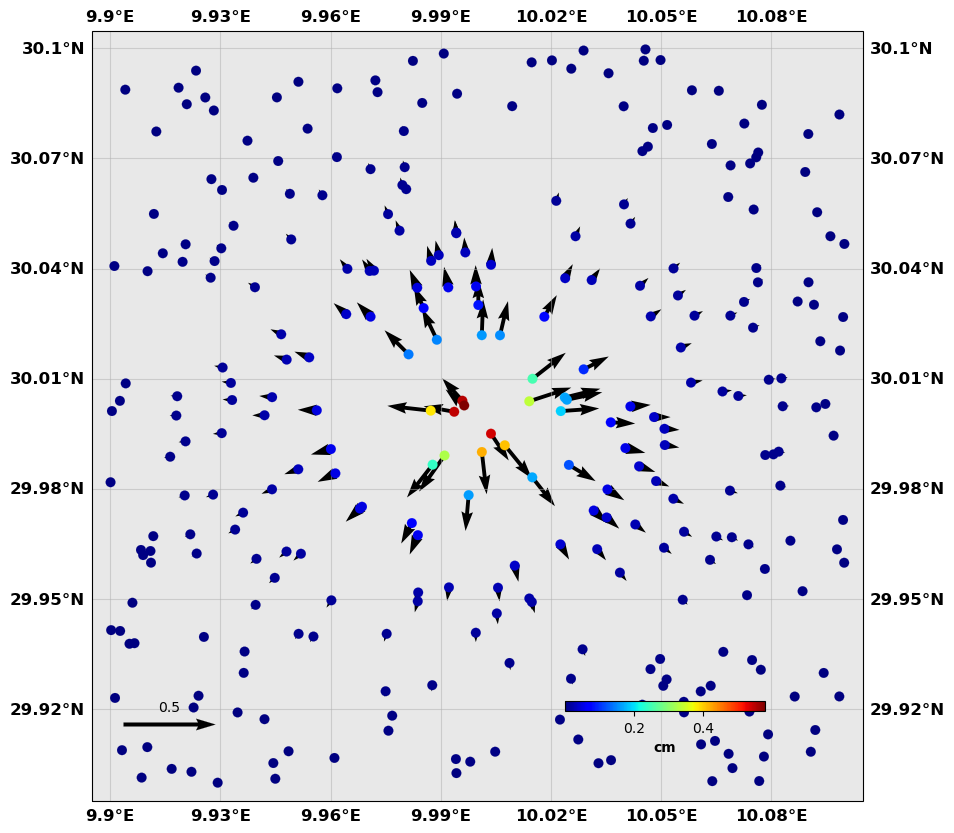

In [7]:
# Make a plot
gpsNetwork.plot(data=['synth'], scale=2e1, legendscale=0.5, expand=0.005, figsize=(10,10), 
                drawCoastlines=True, vertical=True, verticalsize=50, #verticalnorm=[0, 400],
                colorbar=True, cblabel='cm', cbaxis=[0.6, 0.2, 0.2, 0.01], cborientation='horizontal', 
                title=None)

# If you have the SRTM tiles available in the ~/.local/share/cartopy/SRTM directory, you can plot the topography
# Adding shadedtopo={'source': 'srtm', 'smooth': 10, 'alpha': 0.1} 
# Otherwise, you can also use the GEBCO dataset
# Adding shadedtopo={'source': 'gebco', 'smooth': 10, 'alpha': 0.1}

Carefull: there is no NaNs, the interpolation might be a whole load of garbage...


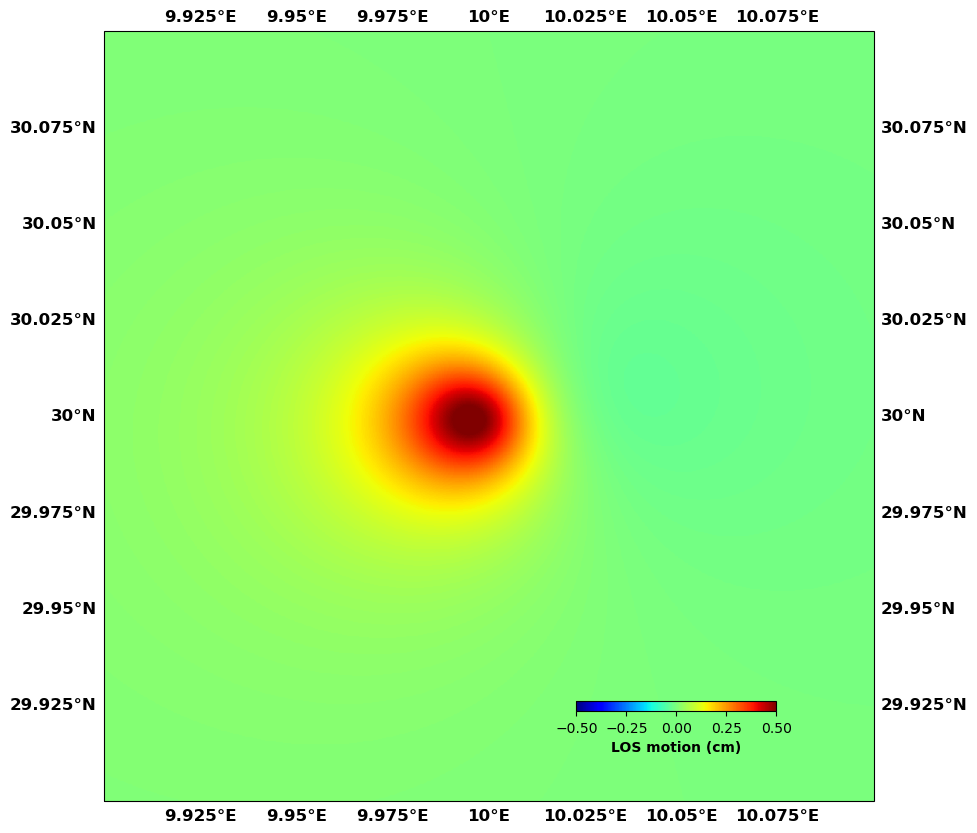

In [8]:
# If you want to show the InSAR
sar.plot(data='synth', expand=0., figsize=(10,10), colorbar=True, plotType='flat', norm=[-0.5, 0.5],
         shadedtopo={'source': 'gebco', 'smooth': 1, 'alpha': 0.1}, title=None,
         cblabel='LOS motion (cm)', cbaxis=[0.6, 0.2, 0.2, 0.01], cborientation='horizontal',)

## Testing the Yang source in CSI

### Create the source

In [9]:
# Initialize the source
source = yang('My Yang source',  lon0=lon0, lat0=lat0)

# Make the shape 
# Lon, Lat, Depth, ax, ay, az, dip, strike,  
# 10°, 30°, 2e3 m, 1000 m, 2000m, 4000m, 90.°, 0°
source.createShape(10., 30., 2e3, 1e3, 1e3, 4e3, 0., 0., latlon=True)

# Make a pressure change (Pa)
source.setPressure(1e6)

---------------------------------
---------------------------------
Initializing pressure source My Yang source
Using CDM conventions for rotation - dip = 90 is vertical, rotation clockwise around Y-axis (N-S). dip = 0, strike = 0 source elongated N-S


### Create the GNSS network

In [10]:
# Create a gps network
gpsNetwork = gps('My GPS network', lon0=lon0, lat0=lat0)

# Drop random stations around the source
# Center of the box (lon, lat), box size in degrees, number of stations
gpsNetwork.createNetwork(10., 30., .1, 300)

---------------------------------
---------------------------------
Initialize GPS array My GPS network


### Create the fake InSAR data

In [11]:
# Create some points where we will have InSAR data
sar = insar('My InSAR network', lon0=lon0, lat0=lat0)

# Fake pixel positions
lon = np.linspace(9.9, 10.1, 1000)
lat = np.linspace(29.9, 30.1, 1000)
lon,lat = np.meshgrid(lon,lat)
lon = lon.flatten().squeeze()
lat = lat.flatten().squeeze()

# Read data into the InSAR object (make it so that it has the incidence of an ascending track)
sar.read_from_binary(np.zeros(lon.shape), lon, lat, incidence=40., heading=-13.)
sar.nx = 1000
sar.ny = 1000

---------------------------------
---------------------------------
Initialize InSAR data set My InSAR network


### Build Greens' functions

In [12]:
# Build Green's functions
source.buildGFs(gpsNetwork)
source.buildGFs(sar, verbose=True, vertical=True)

Greens functions computation method: volume
---------------------------------
---------------------------------
Building pressure source Green's functions for the data set 
My GPS network of type gps in a homogeneous half-space
Converting to pressure for Yang Green's function calculations
 
Greens functions computation method: volume
---------------------------------
---------------------------------
Building pressure source Green's functions for the data set 
My InSAR network of type insar in a homogeneous half-space
Converting to pressure for Yang Green's function calculations
 


### Build synthetic motion

In [13]:
# Make a synthetic dataset
gpsNetwork.buildsynth(source)
sar.buildsynth(source)

# Here, everything is in meters. 
# Let's convert to cm
gpsNetwork.synth *= 1e2
sar.synth *= 1e2

### Show me

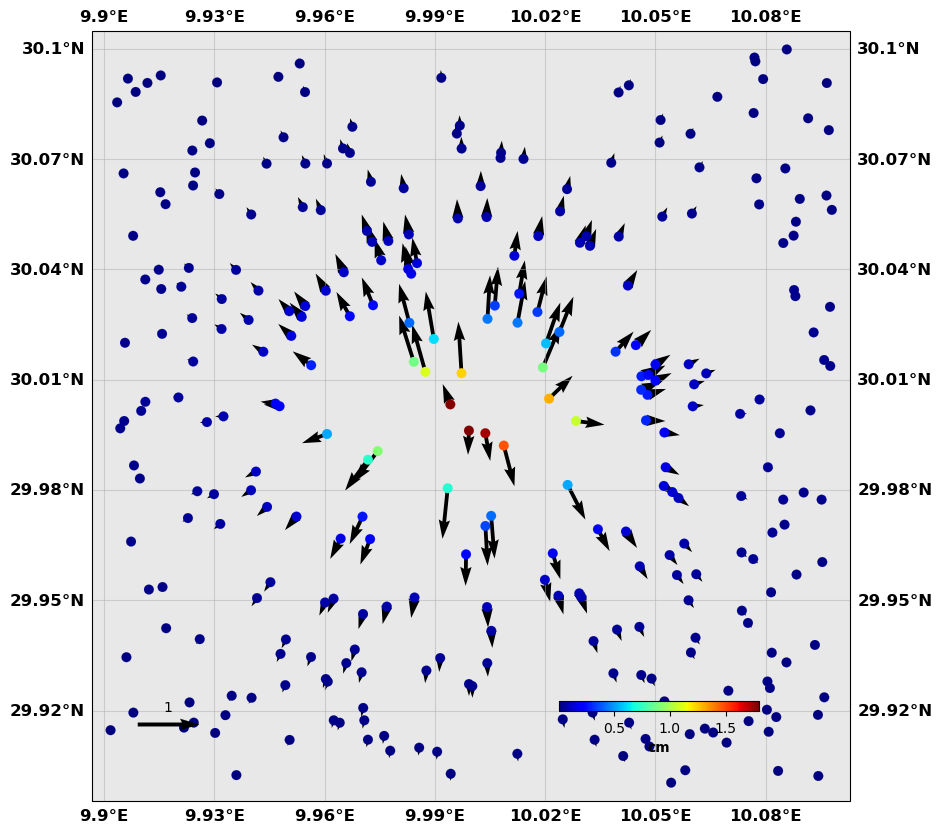

In [14]:
# Make a plot
gpsNetwork.plot(data=['synth'], scale=6e1, legendscale=1, expand=0.005, figsize=(10,10), 
                drawCoastlines=True, vertical=True, verticalsize=50, #verticalnorm=[0, 400],
                colorbar=True, cblabel='cm', cbaxis=[0.6, 0.2, 0.2, 0.01], cborientation='horizontal', 
                title=None)

# If you have the SRTM tiles available in the ~/.local/share/cartopy/SRTM directory, you can plot the topography
# Adding shadedtopo={'source': 'srtm', 'smooth': 10, 'alpha': 0.1} 
# Otherwise, you can also use the GEBCO dataset
# Adding shadedtopo={'source': 'gebco', 'smooth': 10, 'alpha': 0.1}

Carefull: there is no NaNs, the interpolation might be a whole load of garbage...


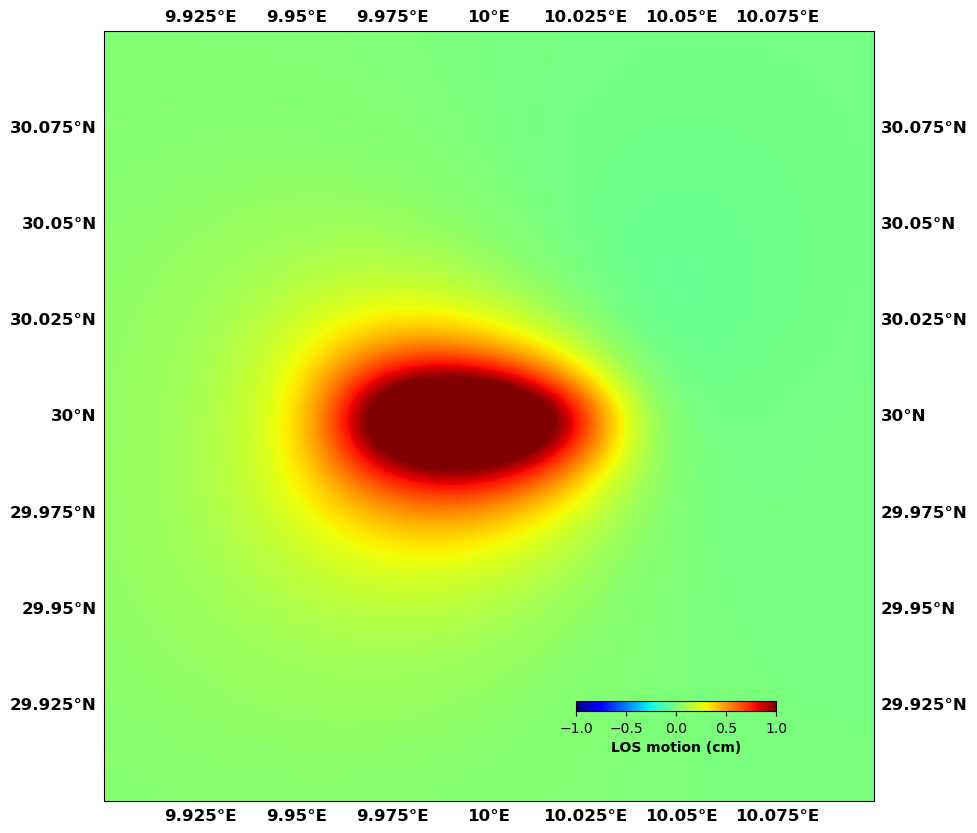

In [15]:
# If you want to show the InSAR
sar.plot(data='synth', expand=0., figsize=(10,10), colorbar=True, plotType='flat', norm=[-1, 1],
         shadedtopo={'source': 'gebco', 'smooth': 1, 'alpha': 0.1}, title=None,
         cblabel='LOS motion (cm)', cbaxis=[0.6, 0.2, 0.2, 0.01], cborientation='horizontal',)

## Testing the CDM source in CSI

This is currently not working properly. Work in progress.

### Create the source

In [16]:
# Initialize the source
source = cdm('My CDM source',  lon0=lon0, lat0=lat0)

# Make the shape 
# Lon, Lat, Depth, ax, ay, az, dip, strike,  
# 10°, 30°, 2e3 m, 1000 m, 2000m, 4000m, 90.°, 0°, 10°
source.createShape(10., 30., 2e3, 1e3, 1e3, 1e3, 90., 10., 10., latlon=True)

# Make an opening change (m)
source.setOpening(1e3)

---------------------------------
---------------------------------
Initializing pressure source My CDM source


/Users/romainjolivet/MYBIN/csi/CDM.py:42: FutureWarning: CDM is not yet fully tested as the amplitudes are awkward. Please check the code.
  warnings.warn("CDM is not yet fully tested as the amplitudes are awkward. Please check the code.", FutureWarning)


### Create the GNSS network

In [17]:
# Create a gps network
gpsNetwork = gps('My GPS network', lon0=lon0, lat0=lat0)

# Drop random stations around the source
# Center of the box (lon, lat), box size in degrees, number of stations
gpsNetwork.createNetwork(10., 30., .1, 300)

---------------------------------
---------------------------------
Initialize GPS array My GPS network


### Create the fake InSAR data

In [18]:
# Create some points where we will have InSAR data
sar = insar('My InSAR network', lon0=lon0, lat0=lat0)

# Fake pixel positions
lon = np.linspace(9.9, 10.1, 1000)
lat = np.linspace(29.9, 30.1, 1000)
lon,lat = np.meshgrid(lon,lat)
lon = lon.flatten().squeeze()
lat = lat.flatten().squeeze()

# Read data into the InSAR object (make it so that it has the incidence of an ascending track)
sar.read_from_binary(np.zeros(lon.shape), lon, lat, incidence=40., heading=-13.)
sar.nx = 1000
sar.ny = 1000

---------------------------------
---------------------------------
Initialize InSAR data set My InSAR network


### Build Greens' functions

In [19]:
# Build Green's functions
source.buildGFs(gpsNetwork)
source.buildGFs(sar, verbose=True, vertical=True)

Greens functions computation method: volume
---------------------------------
---------------------------------
Building pressure source Green's functions for the data set 
My GPS network of type gps in a homogeneous half-space
 
Greens functions computation method: volume
---------------------------------
---------------------------------
Building pressure source Green's functions for the data set 
My InSAR network of type insar in a homogeneous half-space
 


### Build synthetic motion

In [20]:
# Make a synthetic dataset
gpsNetwork.buildsynth(source)
sar.buildsynth(source)

# Here, everything is in meters. 
# Let's convert to cm
gpsNetwork.synth *= 1e2
sar.synth *= 1e2

Scaling by opening


### Show me

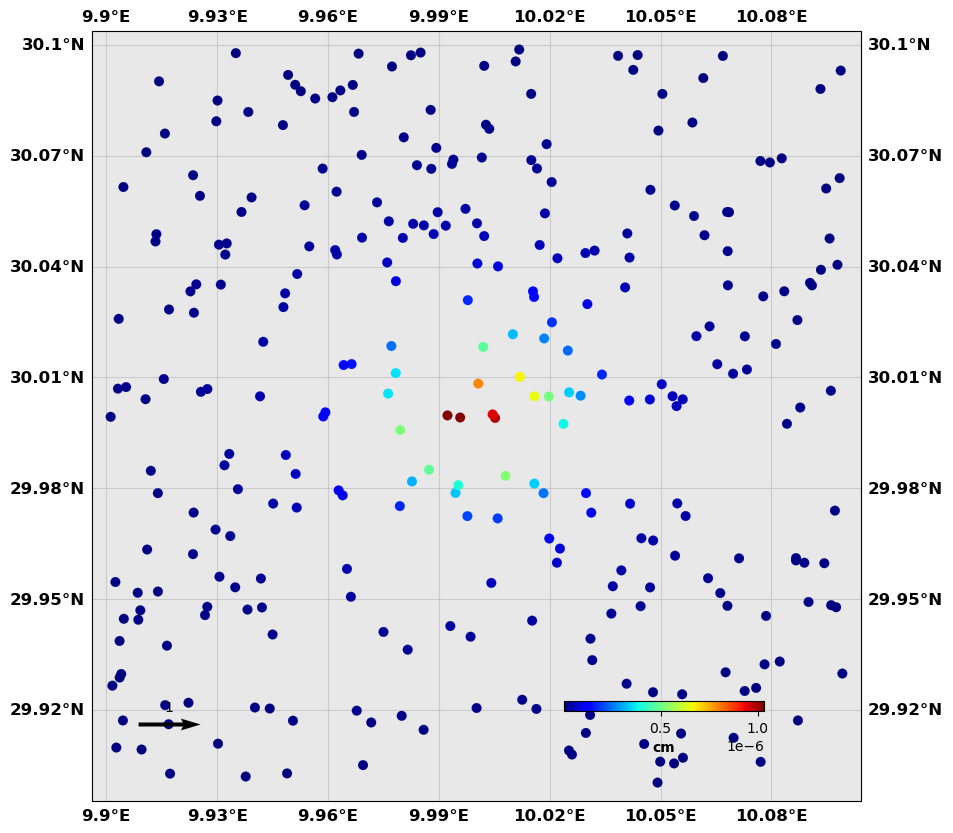

In [21]:
# Make a plot
gpsNetwork.plot(data=['synth'], scale=6e1, legendscale=1, expand=0.005, figsize=(10,10), 
                drawCoastlines=True, vertical=True, verticalsize=50, #verticalnorm=[0, 400],
                colorbar=True, cblabel='cm', cbaxis=[0.6, 0.2, 0.2, 0.01], cborientation='horizontal', 
                title=None)

# If you have the SRTM tiles available in the ~/.local/share/cartopy/SRTM directory, you can plot the topography
# Adding shadedtopo={'source': 'srtm', 'smooth': 10, 'alpha': 0.1} 
# Otherwise, you can also use the GEBCO dataset
# Adding shadedtopo={'source': 'gebco', 'smooth': 10, 'alpha': 0.1}

Carefull: there is no NaNs, the interpolation might be a whole load of garbage...


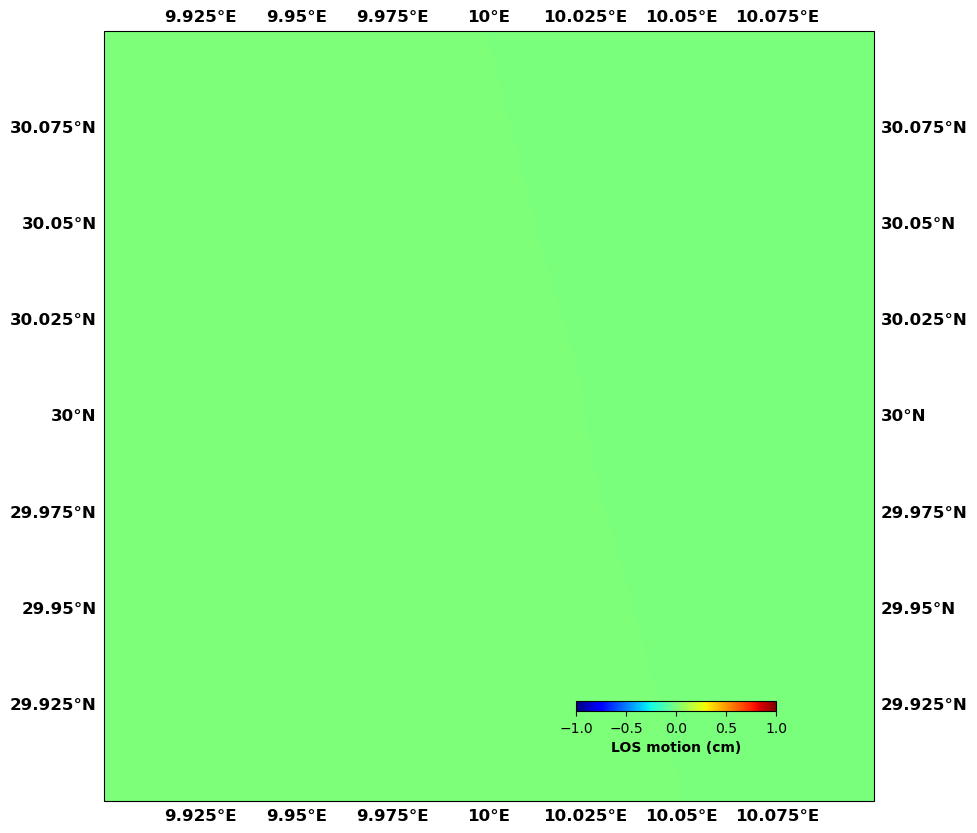

In [22]:
# If you want to show the InSAR
sar.plot(data='synth', expand=0., figsize=(10,10), colorbar=True, plotType='flat', norm=[-1, 1],
         shadedtopo={'source': 'gebco', 'smooth': 1, 'alpha': 0.1}, title=None,
         cblabel='LOS motion (cm)', cbaxis=[0.6, 0.2, 0.2, 0.01], cborientation='horizontal',)